In [2]:
import os
import os.path
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as pyplot


In [20]:
total=pd.read_csv("data/total.csv")
grouped=total.groupby(["Tillage_st_x", "Year"]).agg({"Yield_bu_ac":"mean", "input_cost":"mean", "profit":"mean", "roi":"mean"})

Text(0.5, 1.0, 'Profit Distribution by Tillage Type')

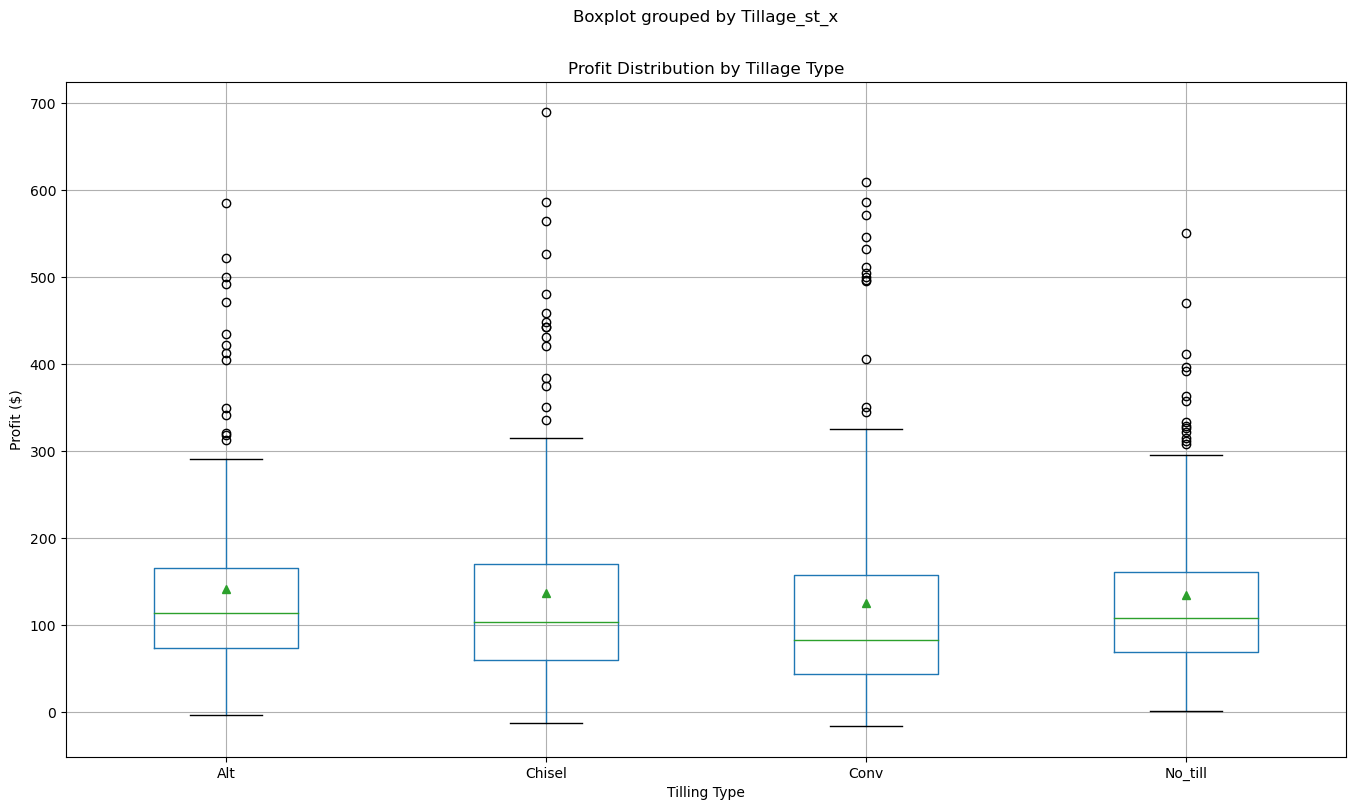

In [26]:
boxplot = total.boxplot(["profit"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Profit ($)")
boxplot.set_title("Profit Distribution by Tillage Type")

Text(0.5, 1.0, 'ROI Distribution by Tillage Type')

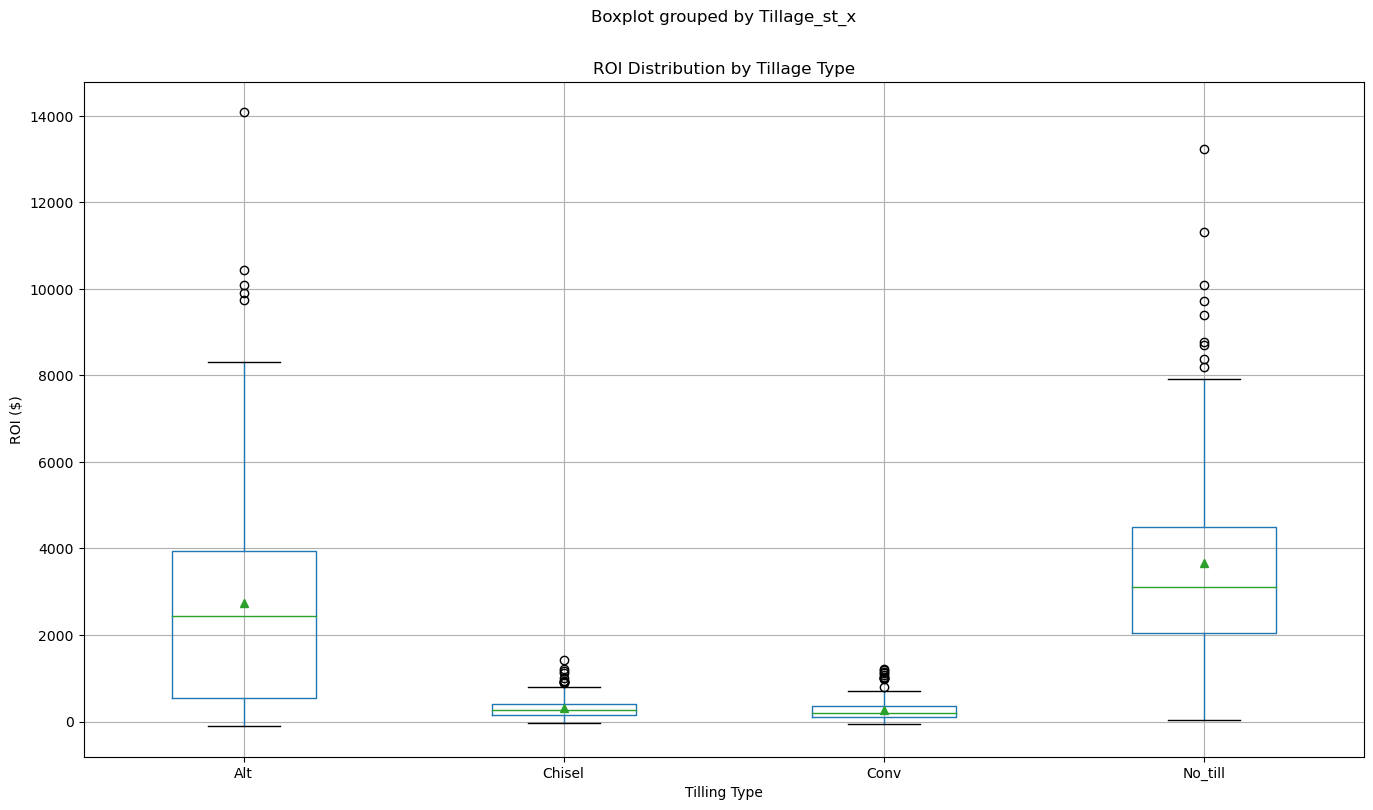

In [27]:
boxplot = total.boxplot(["roi"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("ROI ($)")
boxplot.set_title("ROI Distribution by Tillage Type")

In [7]:
import numpy as np

In [8]:

model=smf.ols(formula="profit ~ C(Tillage_st_x)", data=total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6402
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.589
Time:                        15:47:03   Log-Likelihood:                -4230.4
No. Observations:                 686   AIC:                             8469.
Df Residuals:                     682   BIC:                             8487.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Text(0.5, 1.0, 'Crop Yield Distribution by Tillage Type')

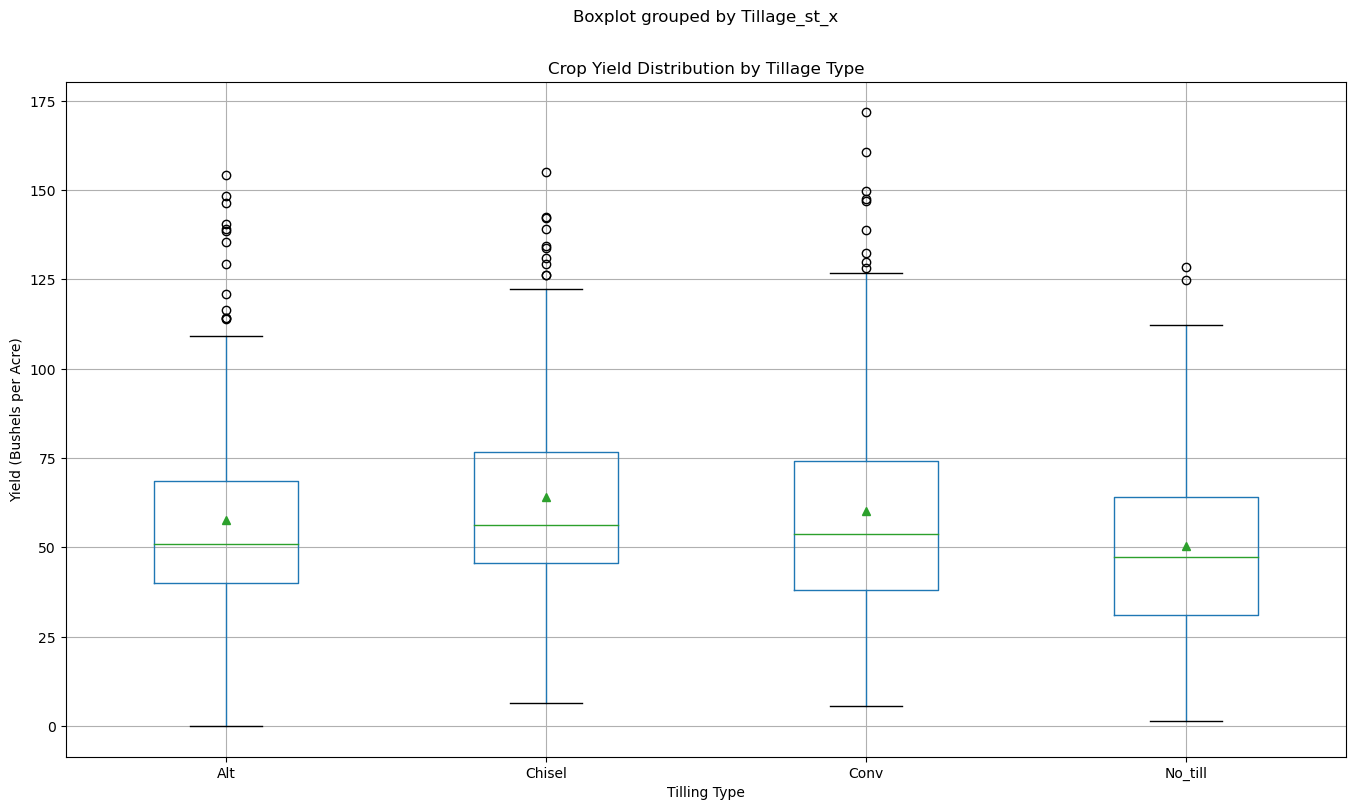

In [29]:
boxplot = total.boxplot(["Yield_bu_ac"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Yield (Bushels per Acre)")
boxplot.set_title("Crop Yield Distribution by Tillage Type")



Text(0.5, 1.0, 'Cost Distribution by Tillage Type')

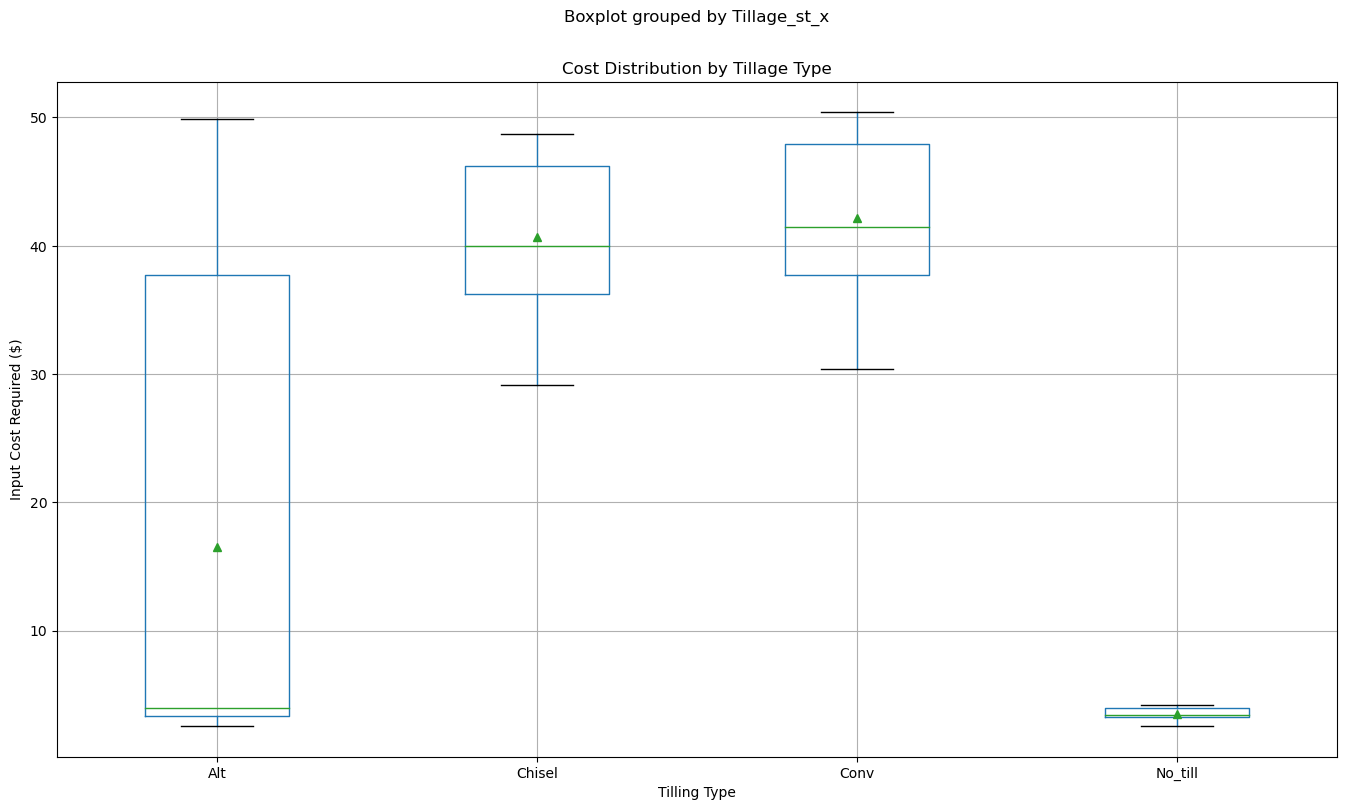

In [28]:
boxplot = total.boxplot(["input_cost"], by = ["Tillage_st_x"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = False )

boxplot.set_xlabel("Tilling Type")
boxplot.set_ylabel("Input Cost Required ($)")
boxplot.set_title("Cost Distribution by Tillage Type")


In [13]:
model = smf.ols("Yield_bu_ac ~ C(Tillage_st_x)", total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Yield_bu_ac   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.252
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           0.000344
Time:                        15:47:44   Log-Likelihood:                -3310.9
No. Observations:                 686   AIC:                             6630.
Df Residuals:                     682   BIC:                             6648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [14]:
model = smf.ols("input_cost ~ C(Tillage_st_x)", total).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             input_cost   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     614.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.87e-197
Time:                        15:47:50   Log-Likelihood:                -2694.1
No. Observations:                 720   AIC:                             5396.
Df Residuals:                     716   BIC:                             5415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [15]:
import scipy.stats as stats

no_till = total[total['Tillage_st_x'] == "No_till"].copy()
no_till.dropna(inplace=True)
alt = total[total['Tillage_st_x'] == "Alt"].copy()
alt.dropna(inplace=True)
chisel = total[total['Tillage_st_x'] == "Chisel"].copy()
chisel.dropna(inplace=True)
conv = total[total['Tillage_st_x'] == "Conv"].copy()
conv.dropna(inplace=True)

In [16]:
t_stat, p_value = stats.ttest_ind(no_till["profit"], conv["profit"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.7685812371152062
P-value: 0.4426754674791201


In [17]:
t_stat, p_value = stats.ttest_ind(no_till["Yield_bu_ac"], conv["Yield_bu_ac"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -2.964726848864808
P-value: 0.003243466104802426


In [18]:
t_stat, p_value = stats.ttest_ind(no_till["input_cost"], conv["input_cost"], nan_policy="omit")

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -85.2176991889578
P-value: 1.7333650271003115e-231


In [19]:

f_statistic, p_value = stats.f_oneway(no_till["profit"], conv["profit"],chisel["profit"], alt["profit"])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.6402117646043431
P-value: 0.589315391872417
